# Chapter 12: Sequences and Time Sequences
## Chapter 12.1: Generating Time Signals


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotSeries(timeline, values, title = ''):
    plt.figure(figsize=(10,6))
    plt.plot(timeline, values)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()
time = np.arange(4*365+1)

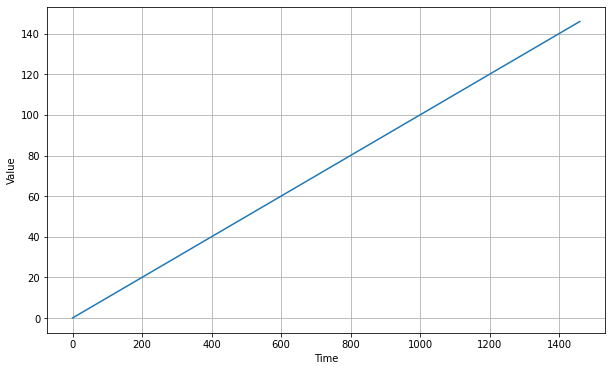

In [3]:
# Step1: 生成主要的上升趋势
slope = 0.1
plotSeries(time, time * slope)

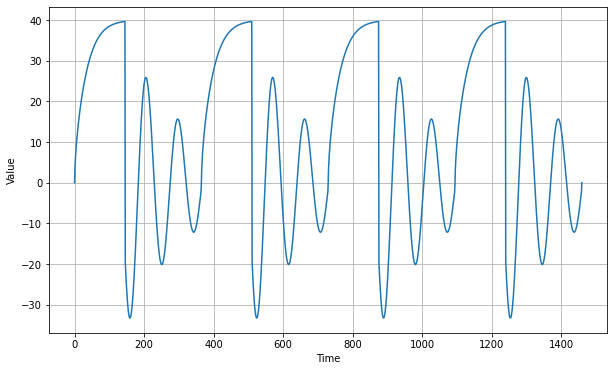

In [4]:
# Step2: 生成季节性的时间序列
def seasonality(time, period, amplitud=0, phase=0):
    interval = ((time+phase)%period)/period
    return amplitud*np.where(interval<0.4, np.tanh(interval*2*np.pi)**0.6, 2/np.exp(2*interval)*np.sin(interval*25))

plotSeries(time, seasonality(time, period=365, amplitud=40))

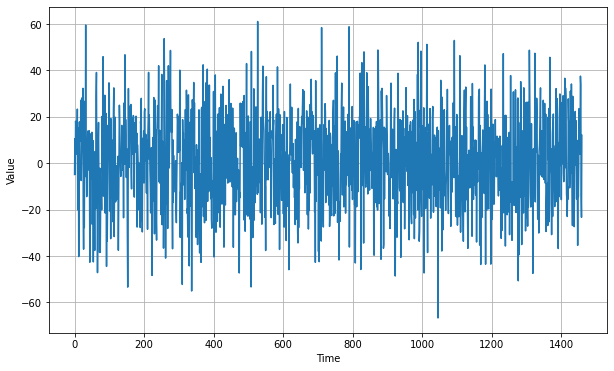

In [5]:
# Step3: 生成噪音
def noise(time, amplifer=1):
    return np.random.randn(len(time))*amplifer

plotSeries(time, noise(time, amplifer=20))

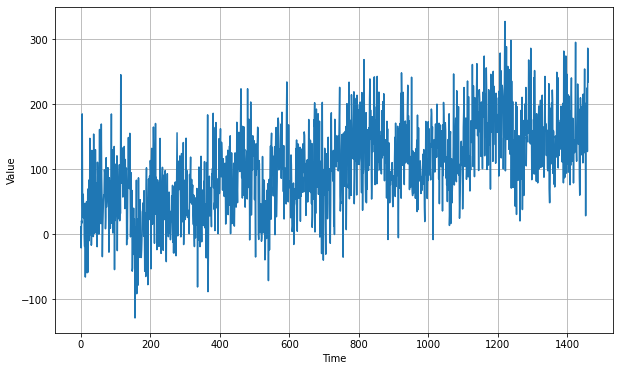

In [6]:
# 结合总体趋势，周期变化，噪声和基准线
slope = 0.1
baseline = 20
finalSeries = baseline + time * slope + seasonality(time, period=365, amplitud=40) + noise(time, amplifer=50) 
plotSeries(time, finalSeries) 

In [7]:
# 平滑移动，使曲线更加平滑
def autoCorrelation1(time, amplitude):
    rho1 = 0.5
    rho2 = -0.1
    ar = np.random.randn(len(time)+50)
    ar[:50] = 20
    for step in range(50, len(time)+50):
        ar[step] += rho1 * ar[step - 50]
        ar[step] += rho2 * ar[step - 33]
    return ar[50:] * amplitude

def autoCorrelation2(time, amplitude):
    rho = 0.8
    ar = np.random.randn(len(time)+1)
    for step in range(1, len(time)+1):
        ar[step] += rho*ar[step-1]
    return ar[1:]*amplitude

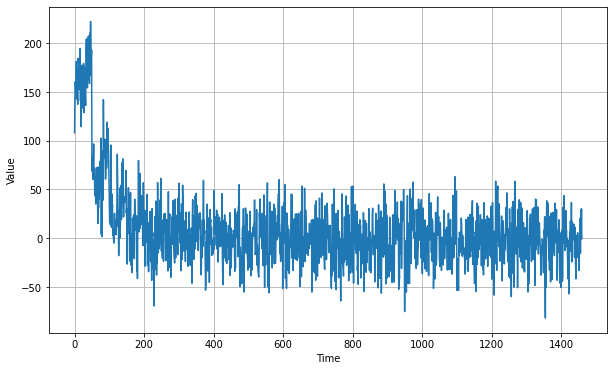

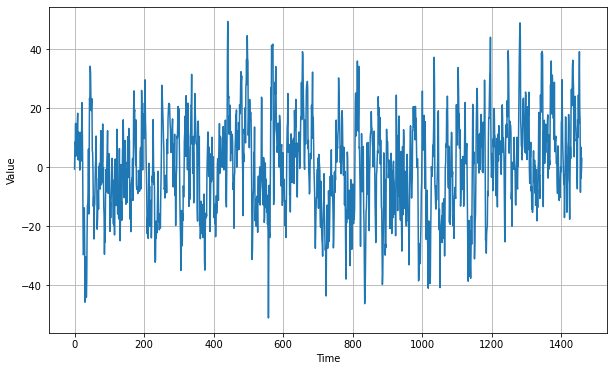

In [8]:
series1_with_correlation = autoCorrelation1(time, 20)
series2_with_correlation = autoCorrelation2(time, 10)

plotSeries(time, series1_with_correlation)
plotSeries(time, series2_with_correlation)

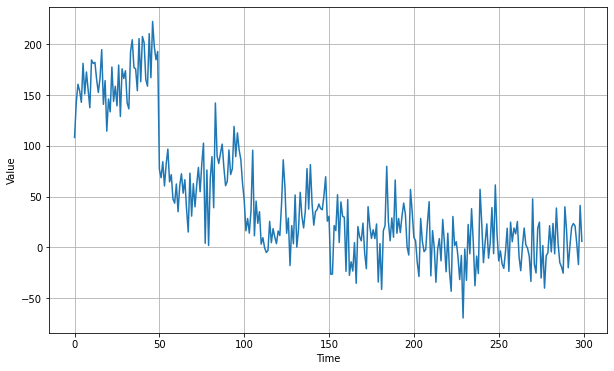

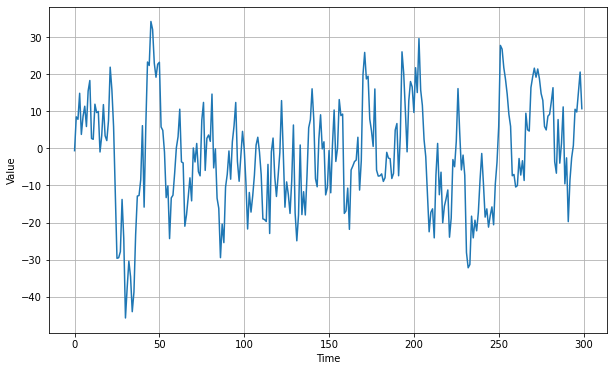

In [9]:
plotSeries(time[:300], series1_with_correlation[:300])
plotSeries(time[:300], series2_with_correlation[:300])

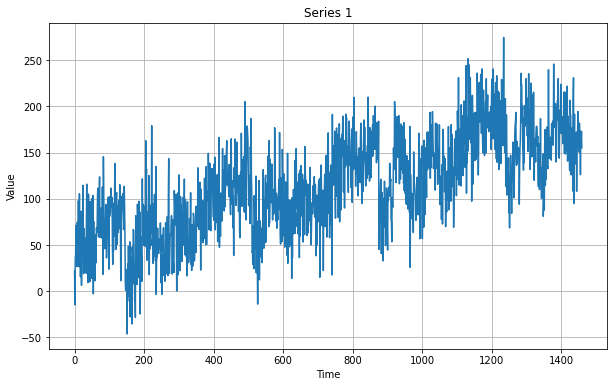

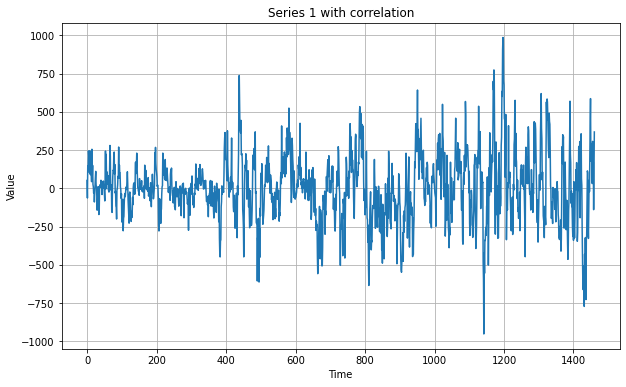

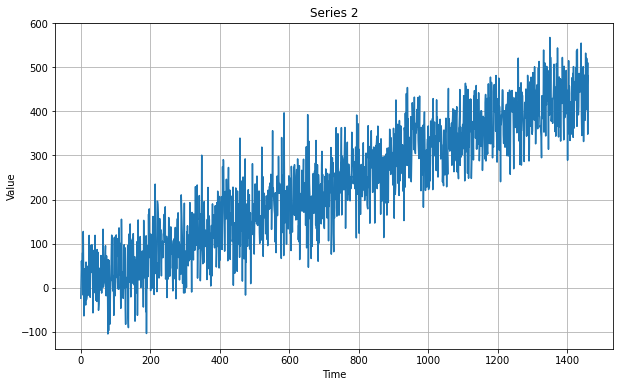

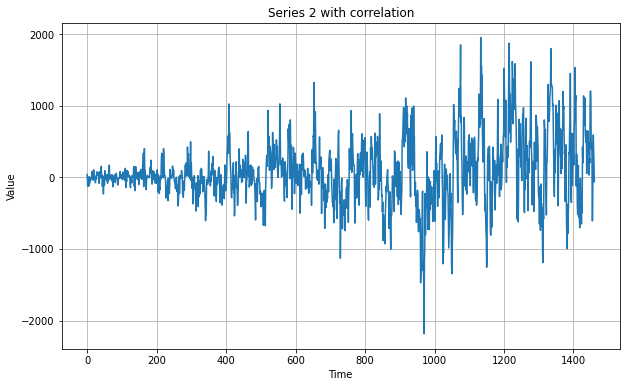

In [10]:
slope = 0.1
baseline = 30
series1 = baseline + time * slope + seasonality(time, period=365, amplitud=40) + noise(time, amplifer=30) 
series1_with_correlation = autoCorrelation2(time, series1)

plotSeries(time, series1, 'Series 1')
plotSeries(time, series1_with_correlation, 'Series 1 with correlation')

slope = 0.3
baseline = 10
series2 = baseline + time * slope + seasonality(time, period=365//2, amplitud=20) + noise(time, amplifer=60) 
series2_with_correlation = autoCorrelation2(time, series2)

plotSeries(time, series2, 'Series 2')
plotSeries(time, series2_with_correlation, 'Series 2 with correlation')

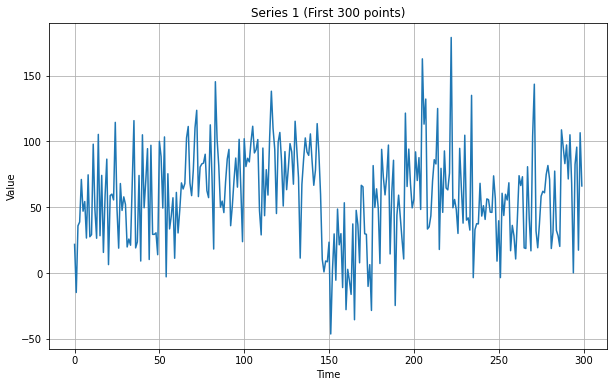

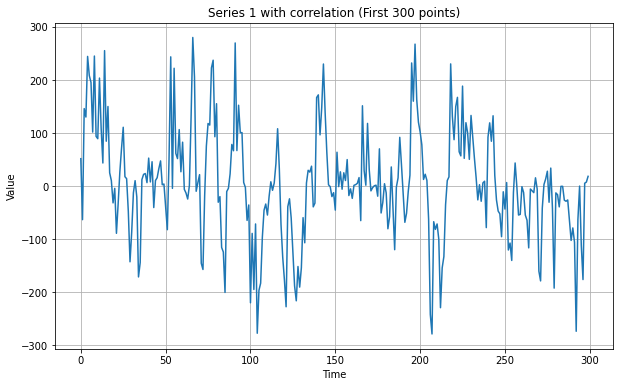

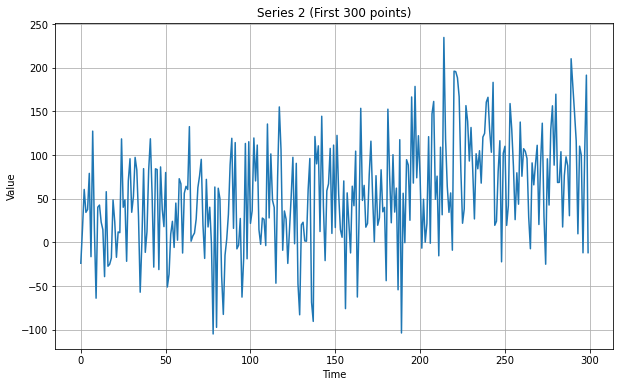

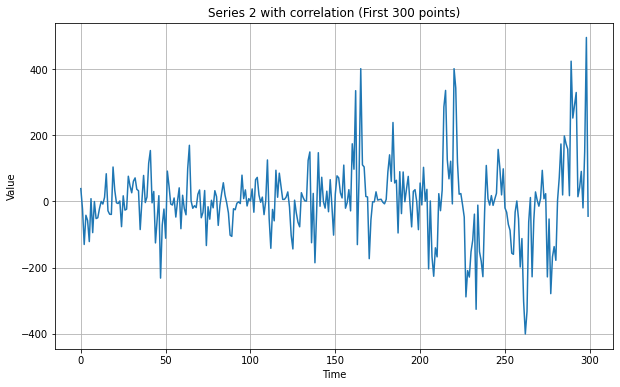

In [11]:
plotSeries(time[:300], series1[:300], 'Series 1 (First 300 points)')
plotSeries(time[:300], series1_with_correlation[:300], 'Series 1 with correlation (First 300 points)')

plotSeries(time[:300], series2[:300], 'Series 2 (First 300 points)')
plotSeries(time[:300], series2_with_correlation[:300], 'Series 2 with correlation (First 300 points)')